# Práctica 5: Red neuronal para clasificación binaria de imágenes de dígitos escritos a mano


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
X = np.load('/content/drive/MyDrive/AA/p5/X.npy')
Y = np.load('/content/drive/MyDrive/AA/p5/y.npy')

X = X[:1000]
Y = Y[:1000]
print(X.shape)
print(Y.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1000, 400)
(1000, 1)


## Visualisacion de los datos

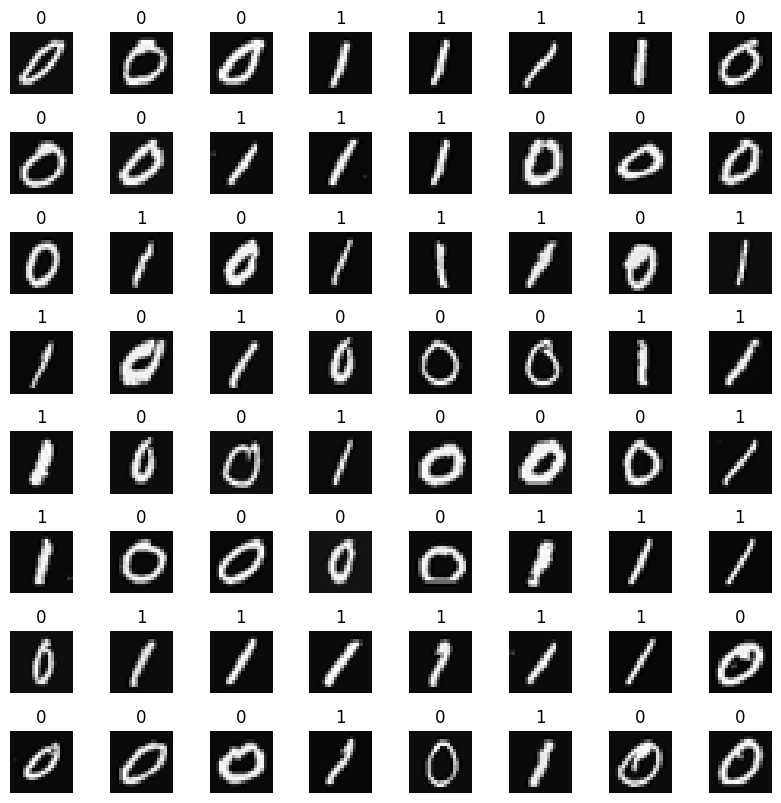

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
       
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y[random_index,0])
    ax.set_axis_off()

# Red neuronal con TensorFlow

## Entrenamiento

In [17]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow import losses

layer_1 = Dense(units=25 , activation="sigmoid")
layer_2 = Dense(units=15 , activation="sigmoid")
layer_3 = Dense(units=1 , activation="sigmoid")

model = Sequential([layer_1, layer_2, layer_3]) # neural network
model.compile(loss= losses.BinaryCrossentropy()) # specify loss and cost
model.fit(X,Y,epochs=100) # Train on data to minimize the cost function with gradient descent 
model.summary()

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.5657
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3828
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2495
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1647
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1122
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0788
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0578
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 13/100
32/32 [=================

In [18]:
# Obtener los pesos de cada capa que genera tensorflow
theta1 = layer_1.get_weights()
theta2 = layer_2.get_weights()
theta3 = layer_3.get_weights()

W1, b1 = theta1[0], theta1[1]
W2, b2 = theta2[0], theta2[1]
W3, b3 = theta3[0], theta3[1]

## Prediccion

In [4]:
# Accuracy
def accuracy(newY, Y):
    acc = np.mean(newY == Y)
    return (acc * 100)

In [5]:
# Prediction
newY = np.zeros((m, 1)) 
for i in range (m):
    f_x = model.predict(X[i].reshape(1,400), verbose = 0)
    if f_x >= 0.5 :
        newY[i] = 1
    else :
        newY[i] = 0

In [6]:
print("Training Set Accuracy using TensorFLow:", accuracy(newY, Y),"%")

Training Set Accuracy using TensorFLow: 100.0 %


# Redes neuronales en Python

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [26]:
def dense(a_in,W,b, g):
  units = W.shape[1]
  a_out = np.zeros(units)
  for j in range(units):
    w = W[:,j]
    z = np.dot(w,a_in) + b[j]
    a_out[j] = g(z)
  return a_out

def sequential(x):
  a1 = dense(x,W1,b1,sigmoid)
  a2 = dense(a1,W2,b2,sigmoid)
  a3 = dense(a2,W3,b3,sigmoid)
  f_x = a3
  return f_x

In [35]:
# Prediction
pred = np.zeros((m, 1)) 

for i in range(m):
  # probability of being a handwritten ‘1’
  f_x = sequential(X[i].reshape(400,1))
  if f_x >= 0.5 :
      pred[i] = 1
  else :
      pred[i] = 0

In [36]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy using Python implementation:",accuracy_score(pred,Y)*100,"%")

Training Set Accuracy using Python implementation: 100.0 %


Obtenemos bien los mismos resultados que con TensorFLow.